In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from src.data.make_dataset import load_data

In [2]:
dataset_path = Path().absolute() / "data/raw/data.csv"
raw_data = load_data(dataset_path)


# Load Data

In [3]:
raw_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
raw_data.shape

(6819, 96)

There are 96 columns and 6819 rows.
The 'Bankrupt?' column is the target variable and the remaining columns are financial metrics where each row represents an individual company. 

Lets look at the feature names and see if we can make sense of a few of the interesting ones.

In [5]:
raw_data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

There are spaces in each of the feature names so lets get rid of them. Note, we will add this transformation to the `transformations.py` file.

In [6]:
raw_data.columns = raw_data.columns.str.strip()

There are far too many interesting things to plot but lets pick out a few that stand out to me. `Per Share Net profit before tax (Yuan ¥)` and `Research and development expense rate` seems like a good place to start.

Most investors start off by looking at the per share net profit or the earnings per share (EPS) metrics before making an investment. I picked R&D expense rate as this is usually leads to economic growth as it spurs innovation, invention, and progress within a company. Read more [here](https://www.investopedia.com/ask/answers/043015/what-are-benefits-research-and-development-company.asp).

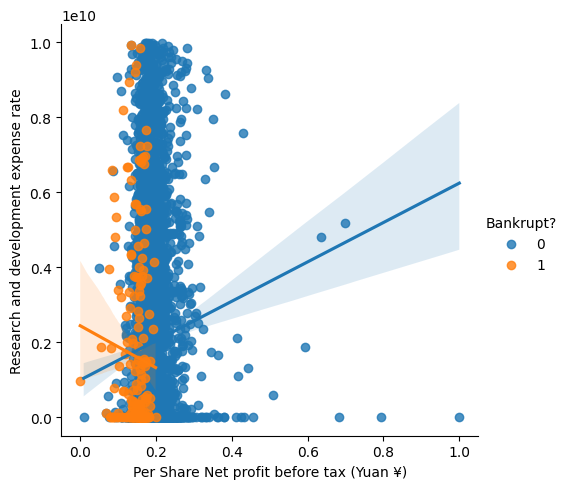

In [7]:
sns.lmplot(
    data=raw_data,
    x="Per Share Net profit before tax (Yuan ¥)", y="Research and development expense rate", hue="Bankrupt?",
    height=5
)

In [8]:
raw_data.groupby("Bankrupt?")["Per Share Net profit before tax (Yuan ¥)"].agg([max, 'count'])

,max,count
Bankrupt?,,
0,1.000000,6599
1,0.198765,220


There are interesting thing to note here: 
1. There seems to be clear divide between which company gets bankrupt based on the per share net profit. When this falls below 20% (i.e. approx. tax rate), majority of bankrupt companies show this metric.
2. As R&D spend increases changes of finding bankrupt companies dilutes. 


Other metrics is cash flow, it is well known that as cash flow shrinks bankruptcy is round the corner. Net profit is obvious indicator on how well a company is doing so lets plot these.

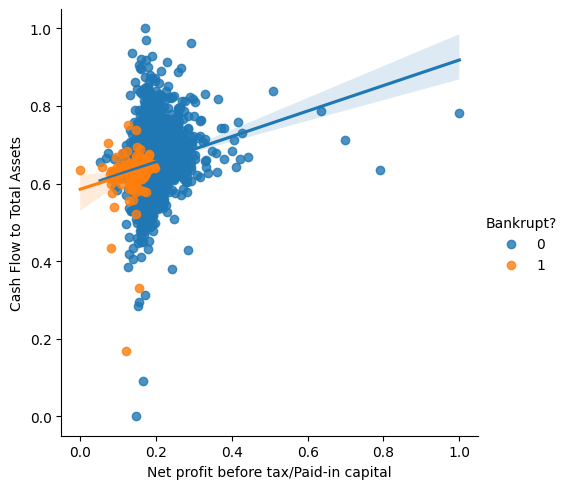

In [9]:
g = sns.lmplot(
    data=raw_data,
    y="Cash Flow to Total Assets", x="Net profit before tax/Paid-in capital", hue="Bankrupt?",
    height=5,
)

Notice how the scales of these features are huge. It is likely we will have to standard scale these features if we go for a gradient based ML algorithm.

In [10]:
for column in raw_data.columns:
    if raw_data[column].std() > 0.5:
        print(f"{column:<40}:{raw_data[column].std():.2f}")

Operating Expense Rate                  :3237683890.52
Research and development expense rate   :2598291554.00
Interest-bearing debt interest rate     :108275033.53
Revenue Per Share (Yuan ¥)              :51707089.77
Total Asset Growth Rate                 :2897717771.17
Net Value Growth Rate                   :114159389.52
Current Ratio                           :33302155.83
Quick Ratio                             :244684748.45
Total debt/Total net worth              :168406905.28
Accounts Receivable Turnover            :278259836.98
Average Collection Days                 :256358895.71
Inventory Turnover Rate (times)         :3247967014.05
Fixed Assets Turnover Frequency         :2477557316.92
Revenue per person                      :136632654.39
Allocation rate per person              :294506294.12
Quick Assets/Current Liability          :171620908.61
Cash/Current Liability                  :510350903.16
Inventory/Current Liability             :582051554.62
Long-term Liability to Cu